In [1]:
#pip install nbformat>=4.2.0


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import datetime as dt
import plotly.express as px


# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import nbformat

In [3]:
df=pd.read_excel('Online Retail.xlsx')
data_copy=df.copy()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Data Preprocessing

In [4]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
data_copy.shape

(541909, 8)

In [6]:
data_copy.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
data_copy['Description']=data_copy['Description'].fillna('Unknown')

In [8]:
data_copy.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [9]:
data_copy.shape

(541909, 8)

In [10]:
data_copy.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [11]:
data_copy.dropna(subset=['CustomerID'],inplace=True)

In [12]:
data_copy['CustomerID']=data_copy['CustomerID'].astype(int)

In [13]:
data_copy['CustomerID']

0         17850
1         17850
2         17850
3         17850
4         17850
          ...  
541904    12680
541905    12680
541906    12680
541907    12680
541908    12680
Name: CustomerID, Length: 406829, dtype: int32

In [14]:
# Remove NaN and Inf values
data_copy.replace([np.inf, -np.inf], np.nan, inplace=True)
data_copy.dropna(inplace=True)

In [15]:
data_copy['Amount'] = data_copy['Quantity']*data_copy['UnitPrice']
data_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [16]:
# This step groups the data in the retail DataFrame by the 'CustomerID' column 
# to calculates the sum of the 'Amount' column for each customer. 
rfm_m = data_copy.groupby('CustomerID')['Amount'].sum().reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346,0.00
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [17]:
# New Attribute : Frequency
# count the number of unique invoice numbers for each customer
rfm_f = data_copy.groupby('CustomerID')['InvoiceNo'].count().reset_index()
rfm_f.head()

,CustomerID,InvoiceNo
0,12346,2
1,12347,182
2,12348,31
3,12349,73
4,12350,17


In [18]:
rfm_f.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)
rfm_f.head()

,CustomerID,Frequency
0,12346,2
1,12347,182
2,12348,31
3,12349,73
4,12350,17


In [19]:
# Merging the two dfs

merged_rfm = rfm_m.merge(rfm_f, on='CustomerID')
# another way 
# rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
merged_rfm.head()

,CustomerID,Amount,Frequency
0,12346,0.00,2
1,12347,4310.00,182
2,12348,1797.24,31
3,12349,1757.55,73
4,12350,334.40,17


In [20]:
#Convert to datetime to proper datatype

data_copy['InvoiceDate'] = pd.to_datetime(data_copy['InvoiceDate'],format='%d-%m-%Y %H:%M')
data_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [21]:
# Compute the maximum date to know the last transaction date in our dataset

max_date = max(data_copy['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [22]:
# calculate the time difference between the maximum date in the dataset and the transaction date for each record

data_copy['Diff'] = max_date - data_copy['InvoiceDate']
data_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373 days 04:24:00


In [23]:
# Compute last transaction date to get the recency of customers 
# As each customer may have multiple invonces that has been purshsed 
# So we need to create a indicator that tells us when he made the last transaction to find wather he is active or not
rfm_p = data_copy.groupby('CustomerID')['Diff'].min().reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346,325 days 02:33:00
1,12347,1 days 20:58:00
2,12348,74 days 23:37:00
3,12349,18 days 02:59:00
4,12350,309 days 20:49:00


In [24]:
# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346,325
1,12347,1
2,12348,74
3,12349,18
4,12350,309


In [25]:
merged_rfm.head()

,CustomerID,Amount,Frequency
0,12346,0.00,2
1,12347,4310.00,182
2,12348,1797.24,31
3,12349,1757.55,73
4,12350,334.40,17


In [26]:
# Merge tha dataframes to get the final RFM dataframe

merged_rfm = merged_rfm.merge(rfm_p, on='CustomerID')

merged_rfm.rename(columns={'Diff': 'Recency'}, inplace=True)
merged_rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346,0.00,2,325
1,12347,4310.00,182,1
2,12348,1797.24,31,74
3,12349,1757.55,73,18
4,12350,334.40,17,309


In [27]:
# Create a DataFrame containing the selected attributes
attributes = ['Amount', 'Frequency', 'Recency']
data = merged_rfm[attributes]

# Create a box plot with Plotly
fig = px.box(data, y=attributes, labels={'variable': 'Attributes', 'value': 'Range'},
             title="Outliers Variable Distribution")
fig.update_layout(
    xaxis=dict(title="Attributes"),
    yaxis=dict(title="Range"),
    showlegend=False,
    boxmode='group',  # Display box plots side by side
    width=800, height=600
)
fig.show()

In [31]:

# Removing (statistical) outliers for Amount
Q1 = merged_rfm.Amount.quantile(0.05)
Q3 = merged_rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
merged_rfm = merged_rfm[(merged_rfm.Amount >= Q1 - 1.5*IQR) & (merged_rfm.Amount <= Q3 + 1.5*IQR)]



# Removing (statistical) outliers for Recency
Q1 = merged_rfm.Recency.quantile(0.05)
Q3 = merged_rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
merged_rfm = merged_rfm[(merged_rfm.Recency >= Q1 - 1.5*IQR) & (merged_rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = merged_rfm.Frequency.quantile(0.05)
Q3 = merged_rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
merged_rfm = merged_rfm[(merged_rfm.Frequency >= Q1 - 1.5*IQR) & (merged_rfm.Frequency <= Q3 + 1.5*IQR)]

In [32]:
attributes = ['Amount', 'Frequency', 'Recency']

fig = px.box(merged_rfm, y=attributes, title="Outliers Variable Distribution", 
             labels={'variable': 'Attributes', 'value': 'Range'},
             boxmode='group', points='outliers')

fig.update_layout(
    xaxis=dict(title="Attributes", title_font=dict(size=14)),
    yaxis=dict(title="Range", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()

In [ ]:
# Create a DataFrame containing the selected attributes
attributes = ['Amount', 'Frequency', 'Recency']
data = merged_rfm[attributes]

# Create a box plot with Plotly
fig = px.box(data, y=attributes, labels={'variable': 'Attributes', 'value': 'Range'},
             title="Outliers Variable Distribution")
fig.update_layout(
    xaxis=dict(title="Attributes"),
    yaxis=dict(title="Range"),
    showlegend=False,
    boxmode='group',  # Display box plots side by side
    width=800, height=600
)
fig.show()

In [33]:
# Rescaling the attributes

merged_rfm = merged_rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(merged_rfm)
rfm_df_scaled.shape

(4293, 3)

In [34]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [35]:
# Create a DataFrame containing the selected attributes
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

C:\Users\Shahzad Ahmad\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(max_iter=50, n_clusters=4)

In [36]:
kmeans.labels_

array([1, 0, 2, ..., 1, 2, 2])

In [37]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    print("For n_clusters={0}, the Elbow score is {1}".format(num_clusters, kmeans.inertia_))

fig = px.line(x=range_n_clusters, y=ssd, 
              title="Elbow Curve for K-Means Clustering",
              labels={'x': 'Number of Clusters', 'y': 'Sum of Squared Distances (SSD)'})

fig.update_layout(
    xaxis=dict(title_font=dict(size=14)),
    yaxis=dict(title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()

C:\Users\Shahzad Ahmad\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Shahzad Ahmad\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Shahzad Ahmad\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters=2, the Elbow score is 7661.705869320753
For n_clusters=3, the Elbow score is 4433.58648174826
For n_clusters=4, the Elbow score is 3360.7191025770217


C:\Users\Shahzad Ahmad\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Shahzad Ahmad\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters=5, the Elbow score is 2802.92617817215
For n_clusters=6, the Elbow score is 2392.033963002565


C:\Users\Shahzad Ahmad\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Shahzad Ahmad\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters=7, the Elbow score is 2039.2893421015083
For n_clusters=8, the Elbow score is 1825.8770001287462


In [38]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

C:\Users\Shahzad Ahmad\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters=2, the silhouette score is 0.5415858652525395


C:\Users\Shahzad Ahmad\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters=3, the silhouette score is 0.5084896296141937


C:\Users\Shahzad Ahmad\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters=4, the silhouette score is 0.4777820100216849


C:\Users\Shahzad Ahmad\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters=5, the silhouette score is 0.46627005641897035


C:\Users\Shahzad Ahmad\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters=6, the silhouette score is 0.4176921719944174


C:\Users\Shahzad Ahmad\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters=7, the silhouette score is 0.41734157386348036


C:\Users\Shahzad Ahmad\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters=8, the silhouette score is 0.4121730023953937


In [39]:
# assign the label
merged_rfm['Cluster_Id'] = kmeans.labels_
merged_rfm.head()

,Amount,Frequency,Recency,Cluster_Id
0,0.00,2,325,6
1,4310.00,182,1,2
2,1797.24,31,74,0
3,1757.55,73,18,3
4,334.40,17,309,6


In [40]:
fig = px.box(merged_rfm, x='Cluster_Id', y='Amount',
             title="Cluster Id vs Amount Box Plot",
             labels={'Cluster_Id': 'Cluster ID', 'Amount': 'Amount'},
             color='Cluster_Id')

fig.update_layout(
    xaxis=dict(title="Cluster ID", title_font=dict(size=14)),
    yaxis=dict(title="Amount", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()

In [41]:
fig = px.scatter(merged_rfm, x='Cluster_Id', y='Amount', color='Frequency',
                 title='Cluster ID vs Amount (Color Encoded by Frequency)',
                 labels={'Cluster_Id': 'Cluster ID', 'Amount': 'Amount', 'Frequency': 'Frequency'})

fig.update_layout(
    xaxis=dict(title="Cluster ID", title_font=dict(size=14)),
    yaxis=dict(title="Amount", title_font=dict(size=14)),
    showlegend=True,
    width=800,
    height=600
)

fig.show()

C:\Users\Shahzad Ahmad\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning:


The palette list has fewer values (3) than needed (8) and will cycle, which may produce an uninterpretable plot.

C:\Users\Shahzad Ahmad\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning:


The palette list has fewer values (3) than needed (8) and will cycle, which may produce an uninterpretable plot.

C:\Users\Shahzad Ahmad\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1615: UserWarning:


The palette list has fewer values (3) than needed (8) and will cycle, which may produce an uninterpretable plot.

C:\Users\Shahzad Ahmad\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1615: UserWarning:


The palette list has fewer values (3) than needed (8) and will cycle, which may produce an uninterpretable plot.



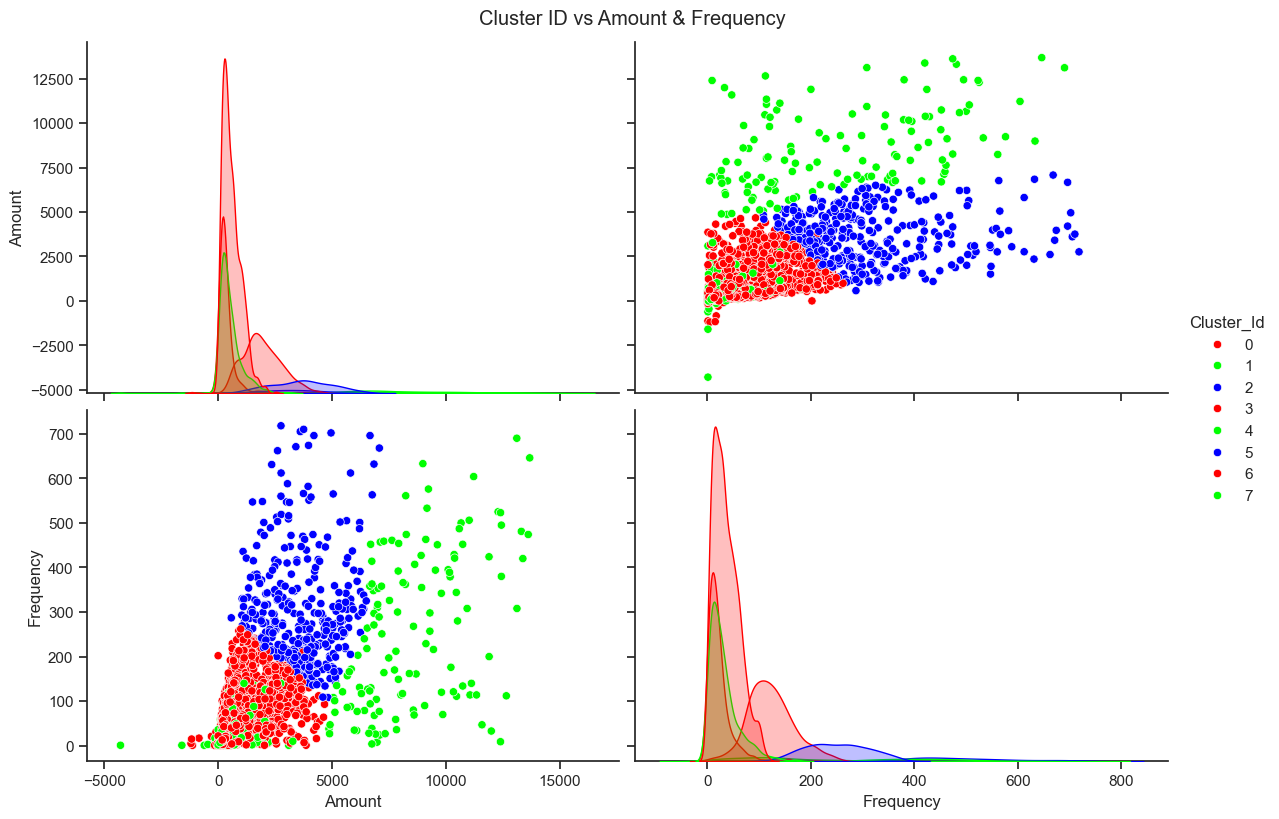

In [42]:
# Create a custom color palette with Red, Green, and Blue
custom_palette = sns.color_palette(["#FF0000", "#00FF00", "#0000FF"])

# Create a scatter plot matrix with separate plots for each cluster, custom palette, and a larger size
sns.set(style="ticks")
sns.pairplot(merged_rfm, hue='Cluster_Id', vars=['Amount', 'Frequency'], palette=custom_palette, height=4, aspect=1.5)
plt.suptitle('Cluster ID vs Amount & Frequency', y=1.02)
plt.show()

In [43]:
fig = px.box(merged_rfm, x='Cluster_Id', y='Frequency',
             title="Cluster Id vs Frequency Box Plot",
             labels={'Cluster_Id': 'Cluster ID', 'Frequency': 'Frequency'})

fig.update_layout(
    xaxis=dict(title="Cluster ID", title_font=dict(size=14)),
    yaxis=dict(title="Frequency", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()

## Box plot to visualize Cluster Id vs Recency

In [44]:
fig = px.box(merged_rfm, x='Cluster_Id', y='Recency',
             title="Cluster Id vs Recency Box Plot",
             labels={'Cluster_Id': 'Cluster ID', 'Recency': 'Recency'})

fig.update_layout(
    xaxis=dict(title="Cluster ID", title_font=dict(size=14)),
    yaxis=dict(title="Recency", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()

In [45]:
# Selecting the two features for clustering
data_for_clustering = merged_rfm[['Amount', 'Frequency']]

# Specify the number of clusters (e.g., 3)
n_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters)
merged_rfm['Cluster_2D'] = kmeans.fit_predict(data_for_clustering)

# Create a scatter plot with Plotly
fig = px.scatter(merged_rfm, x='Amount', y='Frequency', color='Cluster_2D',
                 title='Clustering by Amount and Frequency',
                 labels={'Amount': 'Amount', 'Frequency': 'Frequency', 'Cluster_2D': 'Cluster'})

fig.update_layout(
    xaxis=dict(title="Amount", title_font=dict(size=14)),
    yaxis=dict(title="Frequency", title_font=dict(size=14)),
    width=800,
    height=600
)

fig.show()


C:\Users\Shahzad Ahmad\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



C:\Users\Shahzad Ahmad\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



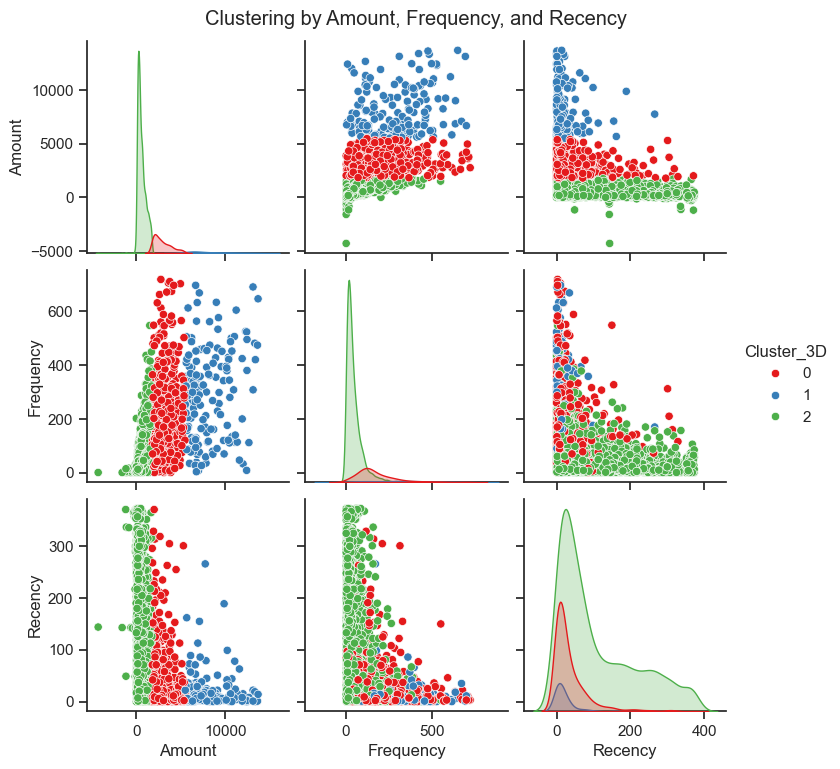

In [46]:
# Selecting the three features for clustering
data_for_clustering = merged_rfm[['Amount', 'Frequency', 'Recency']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters)
merged_rfm['Cluster_3D'] = kmeans.fit_predict(data_for_clustering)

# Visualize the clusters (scatter plot matrix)
sns.set(style="ticks")
sns.pairplot(merged_rfm, hue='Cluster_3D', vars=['Amount', 'Frequency', 'Recency'], palette='Set1')
plt.suptitle('Clustering by Amount, Frequency, and Recency', y=1.02)
plt.show()

In [47]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters)
merged_rfm['Cluster_3D'] = kmeans.fit_predict(data_for_clustering)

# Create a 3D scatter plot matrix with Plotly
fig = px.scatter_3d(merged_rfm, x='Amount', y='Frequency', z='Recency', color='Cluster_3D',
                     labels={'Amount': 'Amount', 'Frequency': 'Frequency', 'Recency': 'Recency', 'Cluster_3D': 'Cluster'})

fig.update_layout(
    scene=dict(
        xaxis_title='Amount',
        yaxis_title='Frequency',
        zaxis_title='Recency',
    ),
    title='Clustering by Amount, Frequency, and Recency',
    width=800,
    height=600
)

fig.show()

C:\Users\Shahzad Ahmad\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



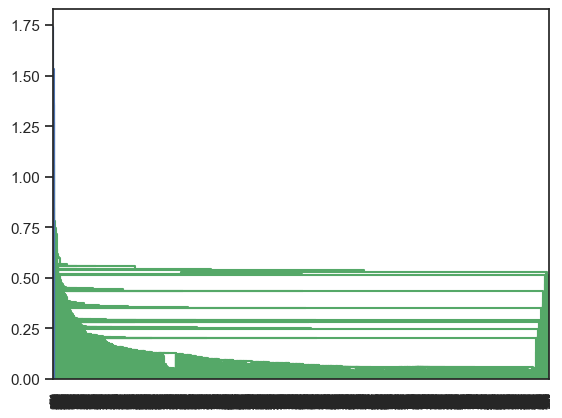

In [48]:
# Single linkage: 

mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

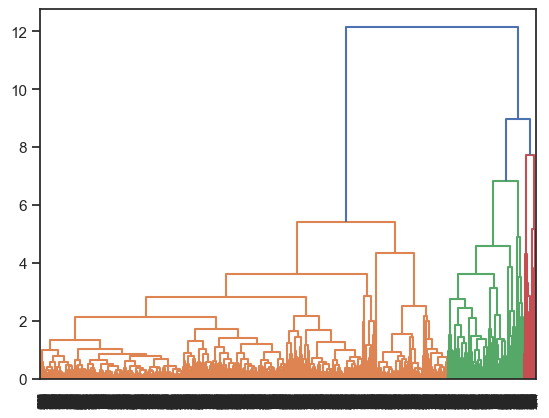

In [49]:
# Complete linkage

mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

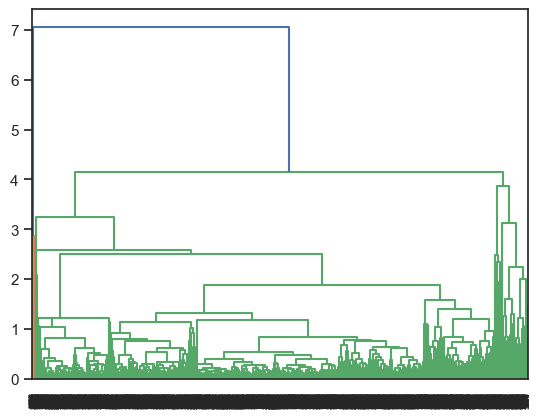

In [50]:
# Average linkage

mergings = linkage(rfm_df_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()